In [67]:
import os 
import pandas as pd
import numpy as np 
import mne
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [17]:
patient_path = '/home/melissa/RESULTS/GRAPH/HUMAN/patients_results/'
patient_ls = []
for file in os.listdir(patient_path):
    print(file[0:3])
    if file[0:3] == '.ip':
        pass
    else:
        patient_df = pd.read_csv(patient_path + file)
        patient_ls.append(patient_df)

P10
P4 
P23
P23
P23
P21
P2 
P7 
P3 
P4 
P7 
P17
P22
P30
P28
P8 
P27
P28
P16
P2 
P1 
P5 
P21
P15
P3 
P29
P11
P24
P18
.ip
P21
P20
P6 


In [18]:
patient_df_concat = pd.concat(patient_ls)

In [19]:
patient_df_concat

,Unnamed: 0,Metric,Patient_ID,Frequency,Channel,Genotype,Value,Idx
0,0,coh,P10 N1,delta,"('E2', 'E1')",GAP,0.582767,165
1,0,coh,P10 N1,delta,"('F3', 'E1')",GAP,0.572689,165
2,0,coh,P10 N1,delta,"('F3', 'E2')",GAP,0.907305,165
3,0,coh,P10 N1,delta,"('C3', 'E1')",GAP,0.722517,165
4,0,coh,P10 N1,delta,"('C3', 'E2')",GAP,0.531733,165
...,...,...,...,...,...,...,...,...
21351,0,wpli,P6 N2,beta,"('M2', 'E1')",GAP,0.246244,1542
21352,0,wpli,P6 N2,beta,"('M2', 'E2')",GAP,0.276410,1542
21353,0,wpli,P6 N2,beta,"('M2', 'F3')",GAP,0.756640,1542
21354,0,wpli,P6 N2,beta,"('M2', 'C3')",GAP,0.277802,1542


In [63]:
df_split_metrics = pd.get_dummies(patient_df_concat, columns=['Metric'], prefix='Metric', prefix_sep='_')
columns_to_encode = ['Frequency','Channel', 'Genotype']

for column in columns_to_encode:
    encoder = LabelEncoder()
    df_split_metrics[column] = encoder.fit_transform(df_split_metrics[column])

In [64]:
df_split_metrics

,Unnamed: 0,Patient_ID,Frequency,Channel,Genotype,Value,Idx,Metric_coh,Metric_pli,Metric_plv,Metric_wpli
0,0,P10 N1,1,3,0,0.582767,165,1,0,0,0
1,0,P10 N1,1,4,0,0.572689,165,1,0,0,0
2,0,P10 N1,1,5,0,0.907305,165,1,0,0,0
3,0,P10 N1,1,0,0,0.722517,165,1,0,0,0
4,0,P10 N1,1,1,0,0.531733,165,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21351,0,P6 N2,0,7,0,0.246244,1542,0,0,0,1
21352,0,P6 N2,0,8,0,0.276410,1542,0,0,0,1
21353,0,P6 N2,0,9,0,0.756640,1542,0,0,0,1
21354,0,P6 N2,0,6,0,0.277802,1542,0,0,0,1


In [65]:
df_save = df_split_metrics.drop('Unnamed: 0', axis=1)

In [66]:
os.chdir('/home/melissa/RESULTS/GRAPH/HUMAN')
df_save.to_csv('all_patients_encoded_connectivity.csv')

In [54]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'df'
# Select the column to be label encoded
columns_to_encode = ['Frequency','Channel', 'Genotype']

In [55]:
for column in columns_to_encode:
    encoder = LabelEncoder()
    df_split_metrics[column] = encoder.fit_transform(df_split_metrics[column])

In [56]:
df_split_metrics['Unnamed']

,Unnamed: 0,Patient_ID,Frequency,Channel,Genotype,Value,Idx,Metric_coh,Metric_pli,Metric_plv,Metric_wpli
0,0,1,1,3,0,0.582767,165,1,0,0,0
1,0,1,1,4,0,0.572689,165,1,0,0,0
2,0,1,1,5,0,0.907305,165,1,0,0,0
3,0,1,1,0,0,0.722517,165,1,0,0,0
4,0,1,1,1,0,0.531733,165,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21351,0,28,0,7,0,0.246244,1542,0,0,0,1
21352,0,28,0,8,0,0.276410,1542,0,0,0,1
21353,0,28,0,9,0,0.756640,1542,0,0,0,1
21354,0,28,0,6,0,0.277802,1542,0,0,0,1


In [28]:
unique_metrics = np.unique(patient_df_concat['Metric'])
unique_freq = np.unique(patient_df_concat['Frequency'])

In [26]:
figure_path = '/home/melissa/RESULTS/GRAPH/HUMAN/plots/'

## Overall Genotype Plots

In [27]:
for unq_met in unique_metrics:
    metric_df = patient_df_concat.loc[patient_df_concat['Metric'] == str(unq_met)]
    print(metric_df)
    # Create the bar plot
    sns.set(style="white")
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Value', hue = 'Genotype', data=metric_df)
    sns.despine()
    plt.xlabel('Frequency')
    plt.ylabel(str(unq_met))
    plt.title(str(unq_met))
    plt.savefig(figure_path + str(unq_met) + '.jpg')
    plt.clf()

      Unnamed: 0 Metric Patient_ID Frequency       Channel Genotype     Value  \
0              0    coh     P10 N1     delta  ('E2', 'E1')      GAP  0.582767   
1              0    coh     P10 N1     delta  ('F3', 'E1')      GAP  0.572689   
2              0    coh     P10 N1     delta  ('F3', 'E2')      GAP  0.907305   
3              0    coh     P10 N1     delta  ('C3', 'E1')      GAP  0.722517   
4              0    coh     P10 N1     delta  ('C3', 'E2')      GAP  0.531733   
...          ...    ...        ...       ...           ...      ...       ...   
5335           0    coh      P6 N2      beta  ('M2', 'E1')      GAP  0.105617   
5336           0    coh      P6 N2      beta  ('M2', 'E2')      GAP  0.084979   
5337           0    coh      P6 N2      beta  ('M2', 'F3')      GAP  0.209422   
5338           0    coh      P6 N2      beta  ('M2', 'C3')      GAP  0.098564   
5339           0    coh      P6 N2      beta  ('M2', 'O1')      GAP  0.148667   

       Idx  
0      165  
1

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

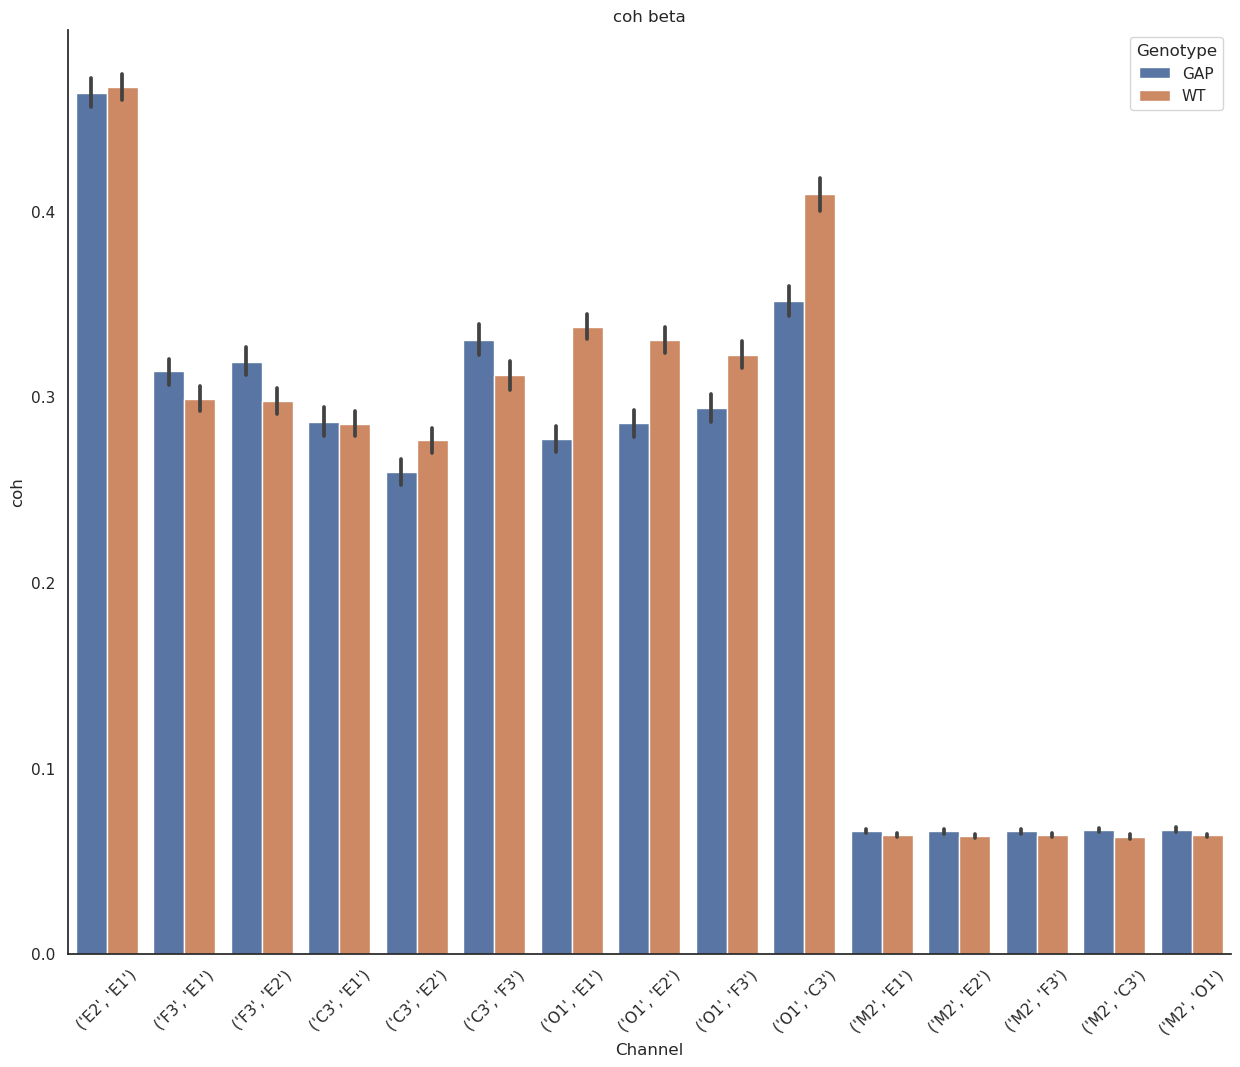

<Figure size 640x480 with 0 Axes>

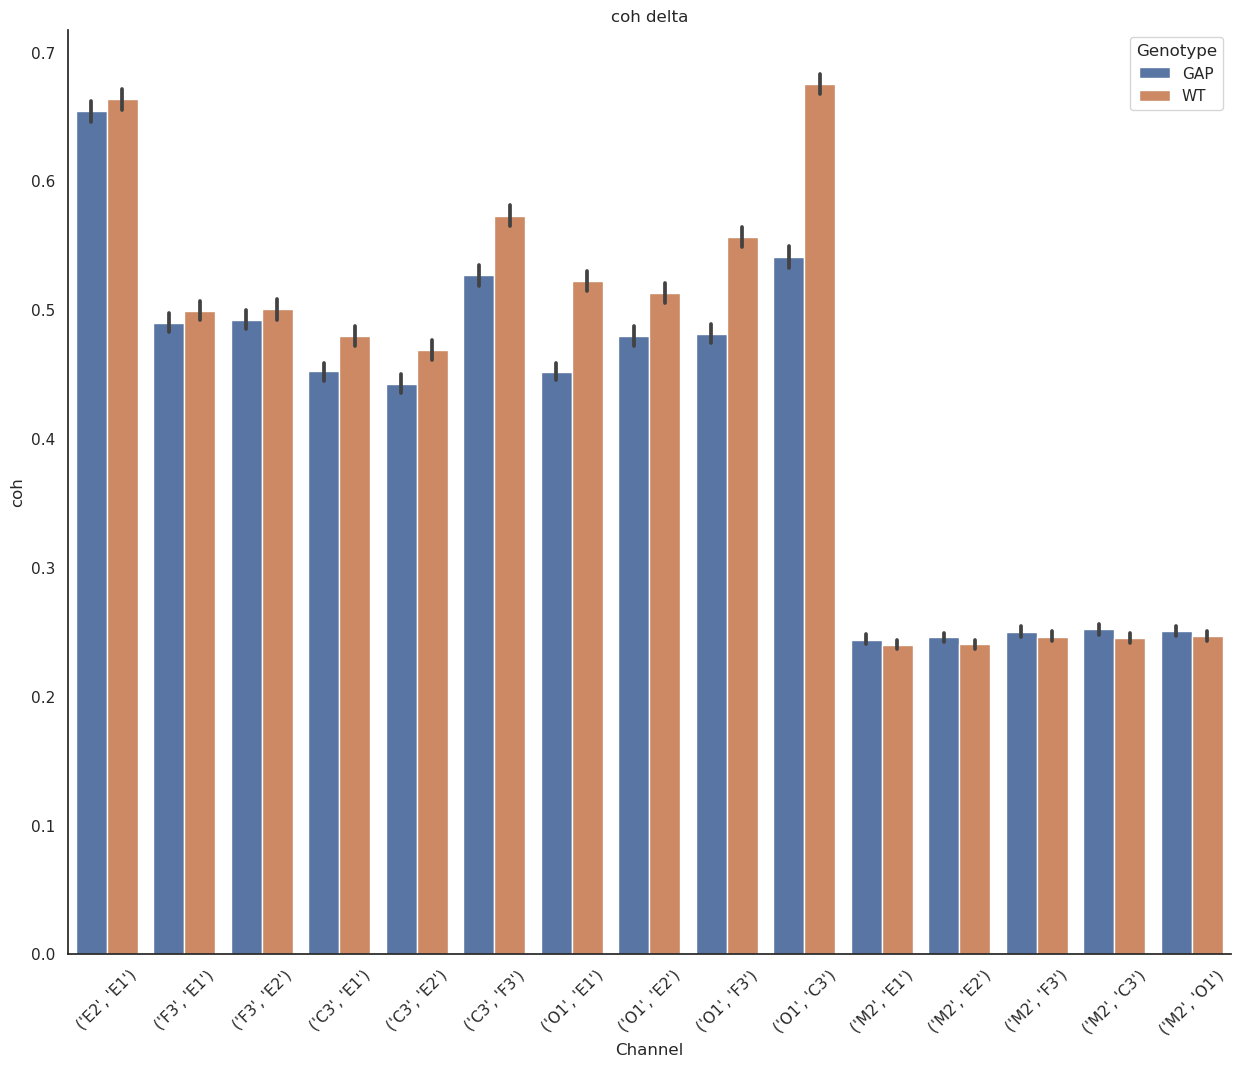

<Figure size 640x480 with 0 Axes>

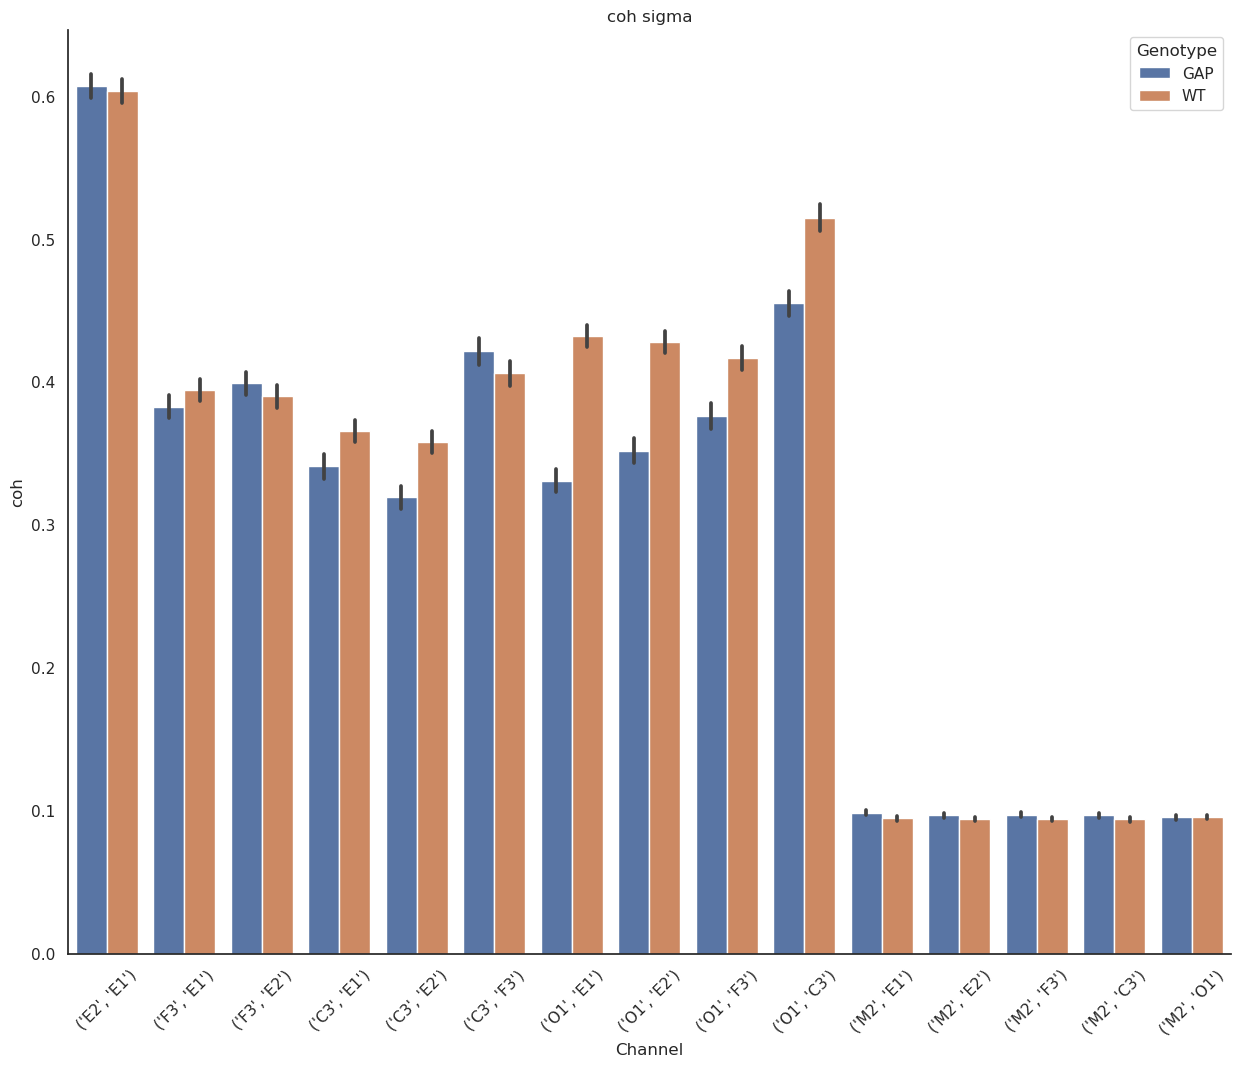

<Figure size 640x480 with 0 Axes>

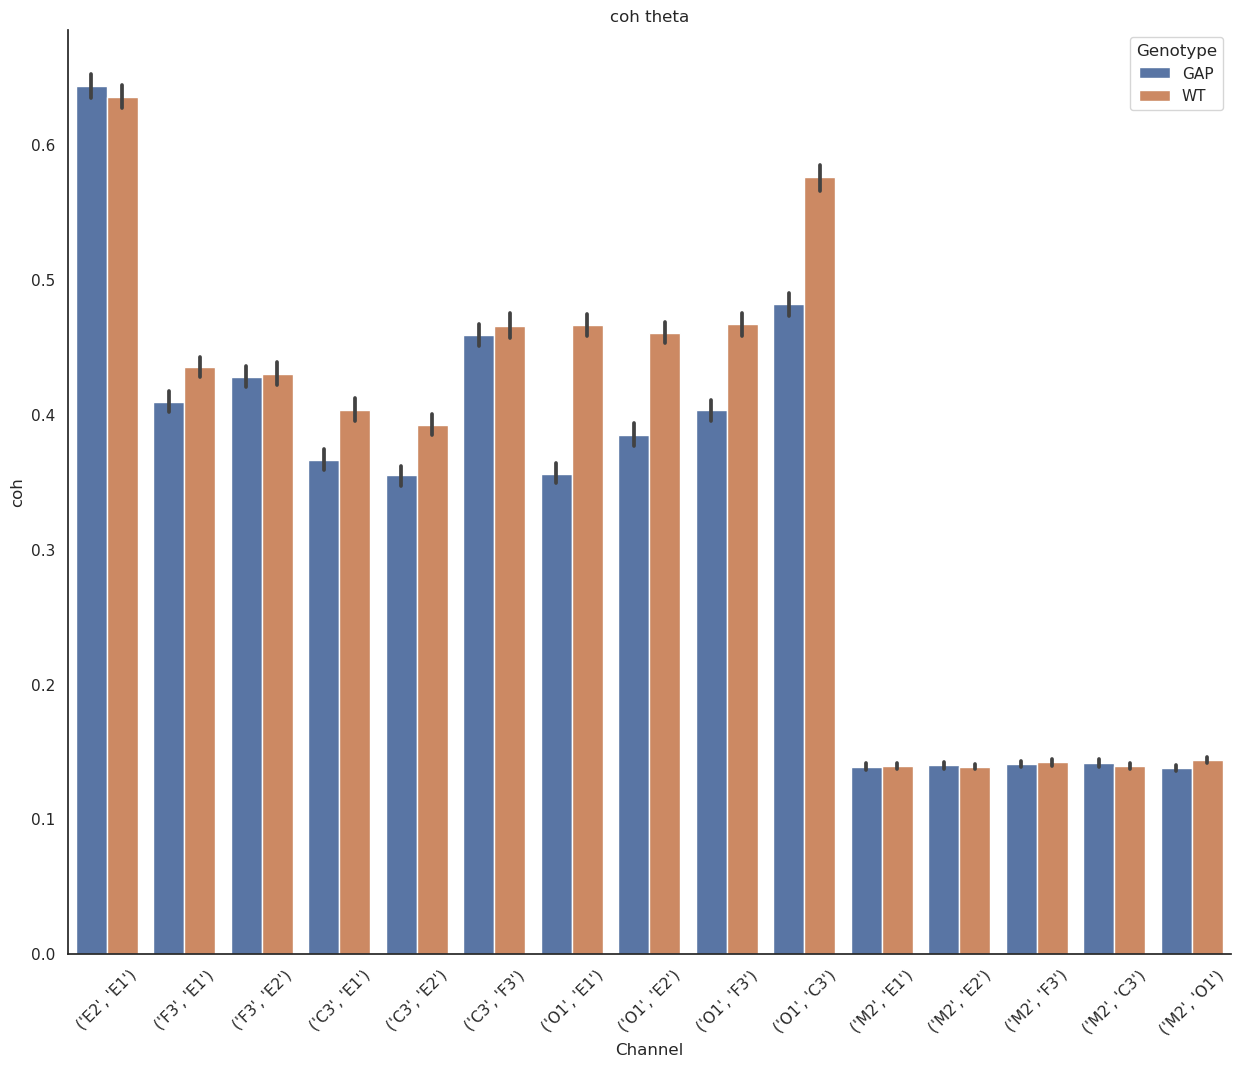

<Figure size 640x480 with 0 Axes>

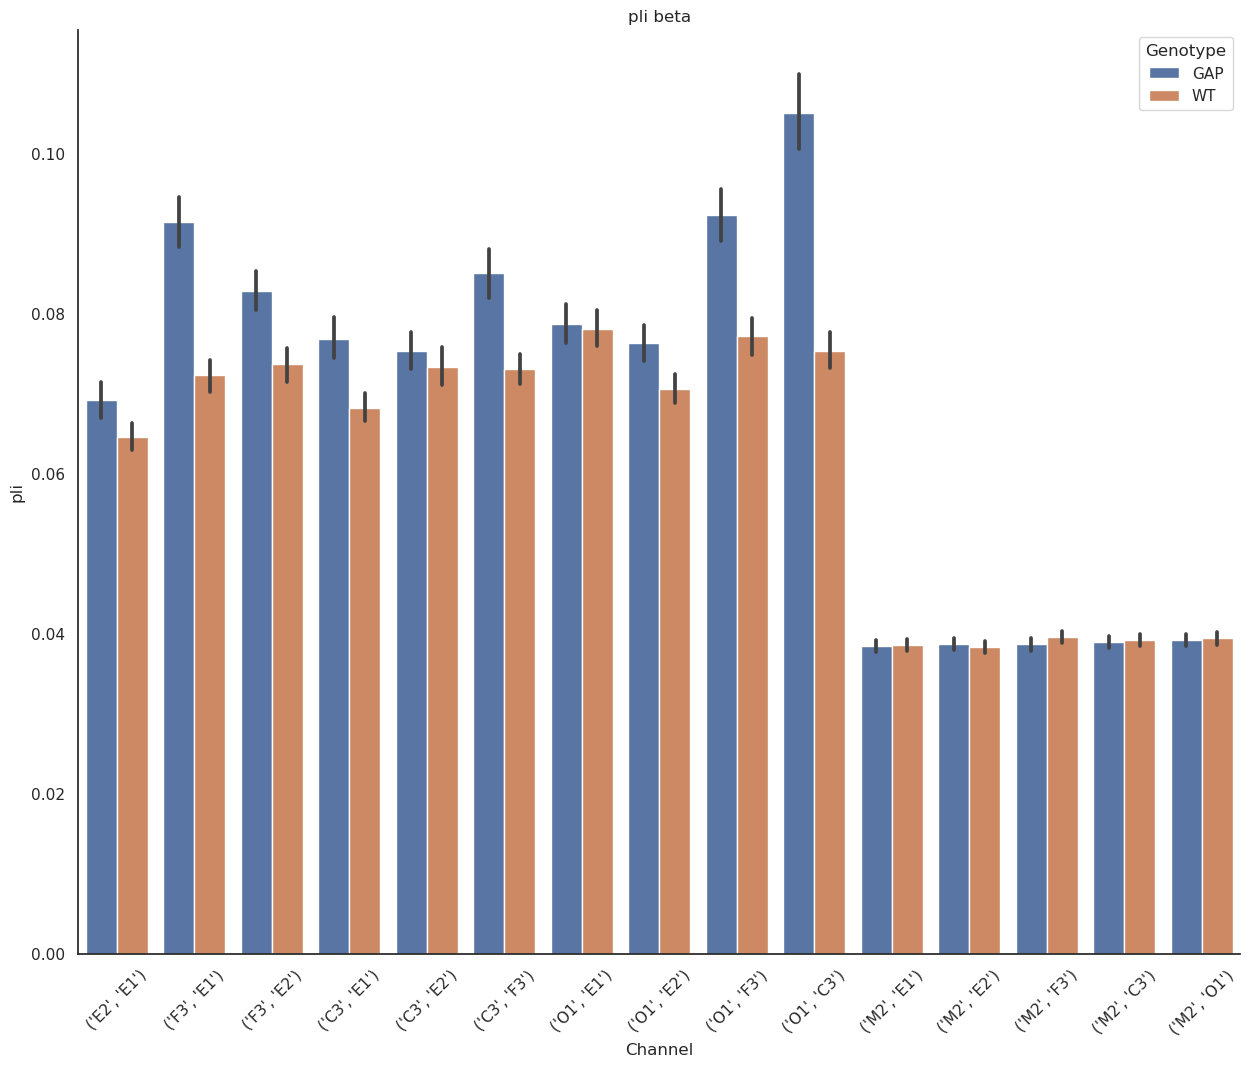

<Figure size 640x480 with 0 Axes>

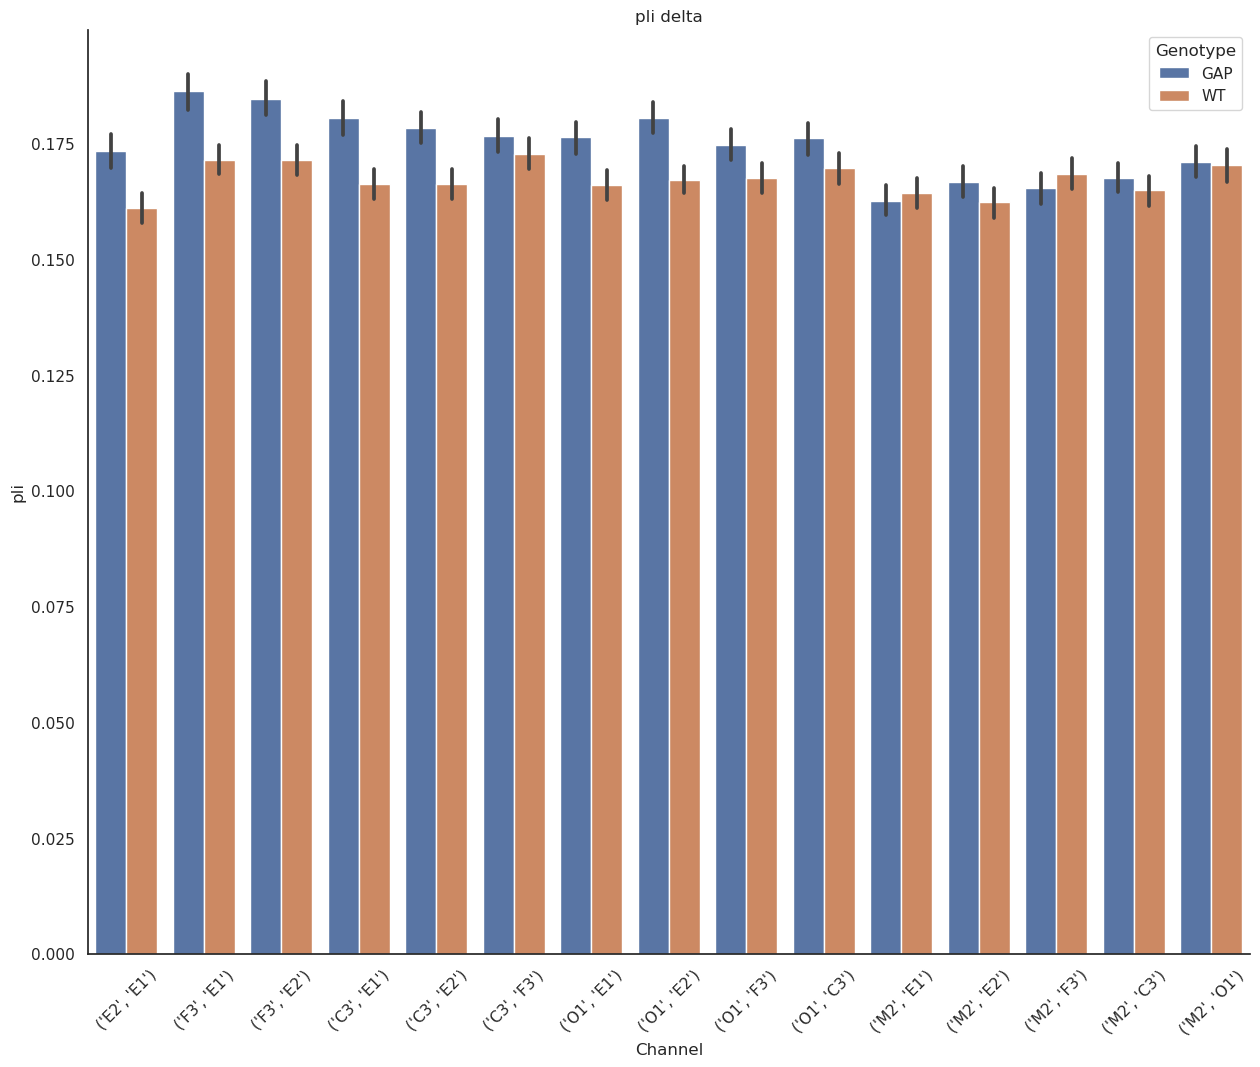

<Figure size 640x480 with 0 Axes>

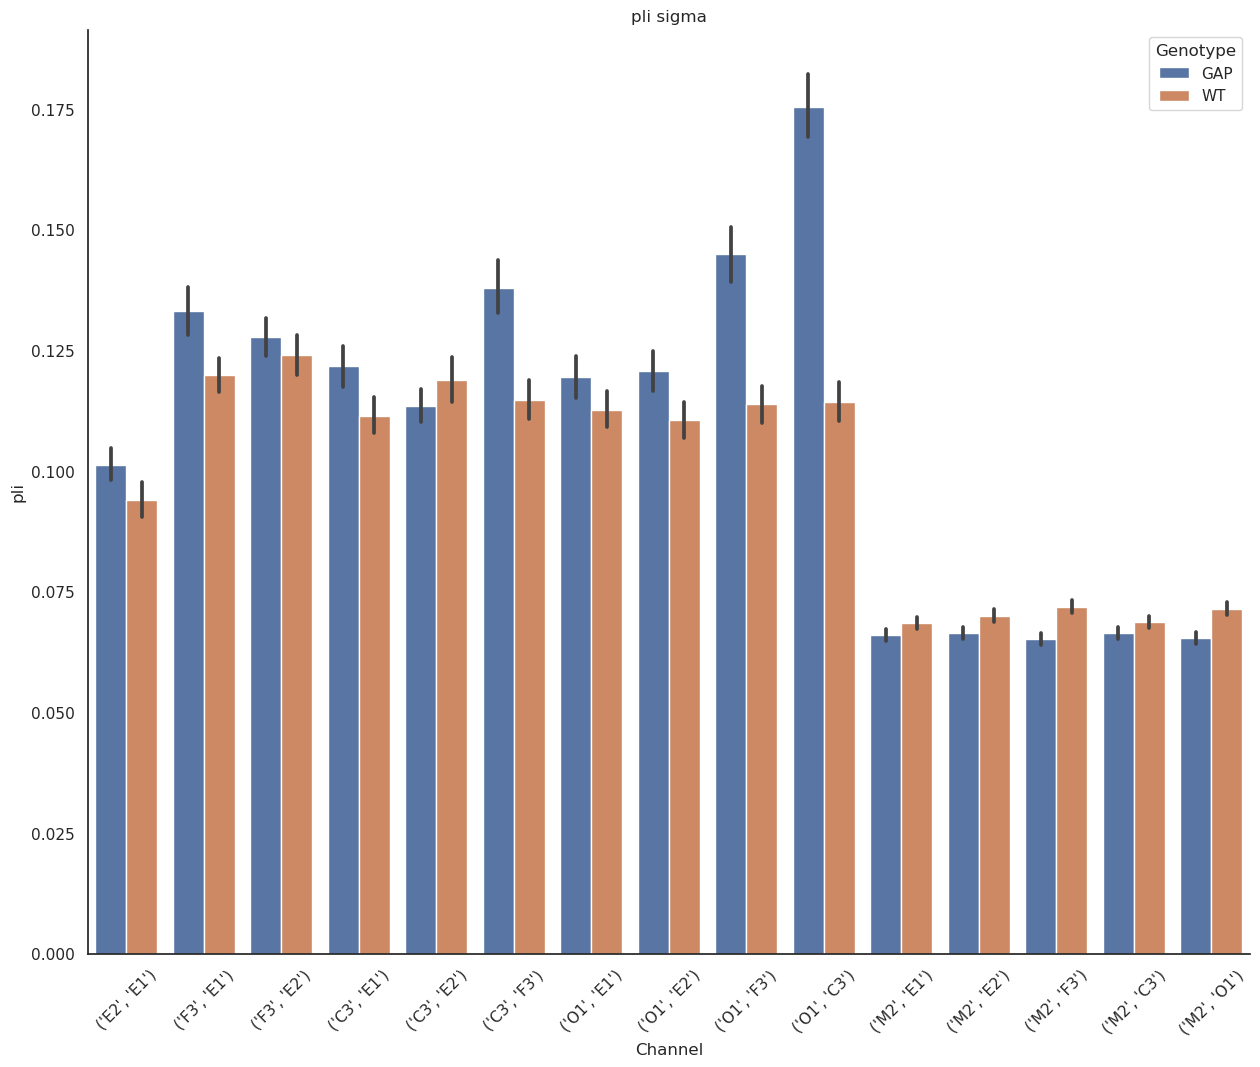

<Figure size 640x480 with 0 Axes>

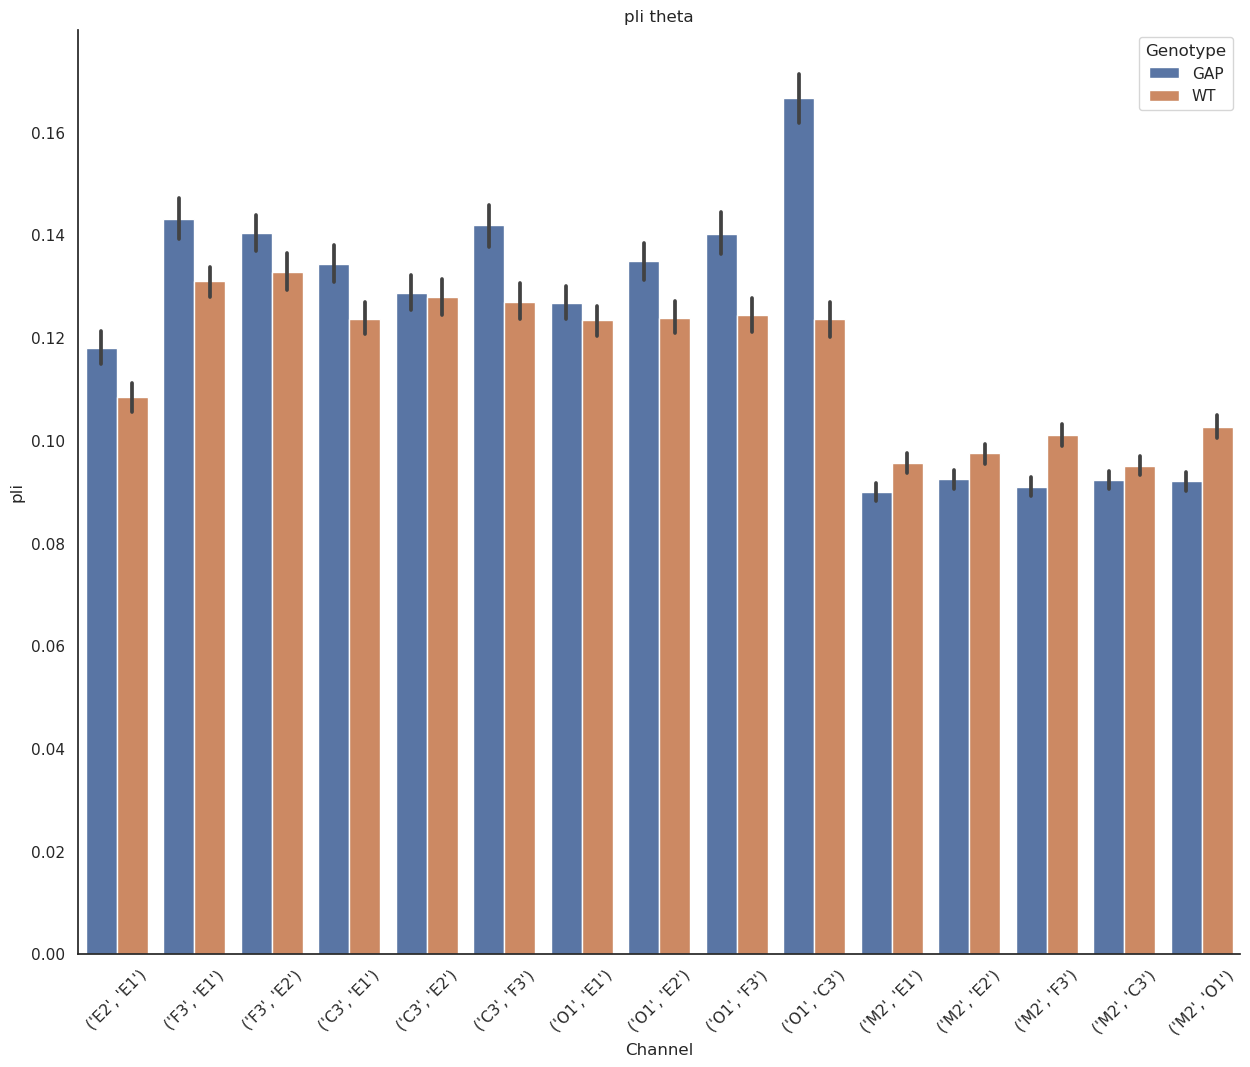

<Figure size 640x480 with 0 Axes>

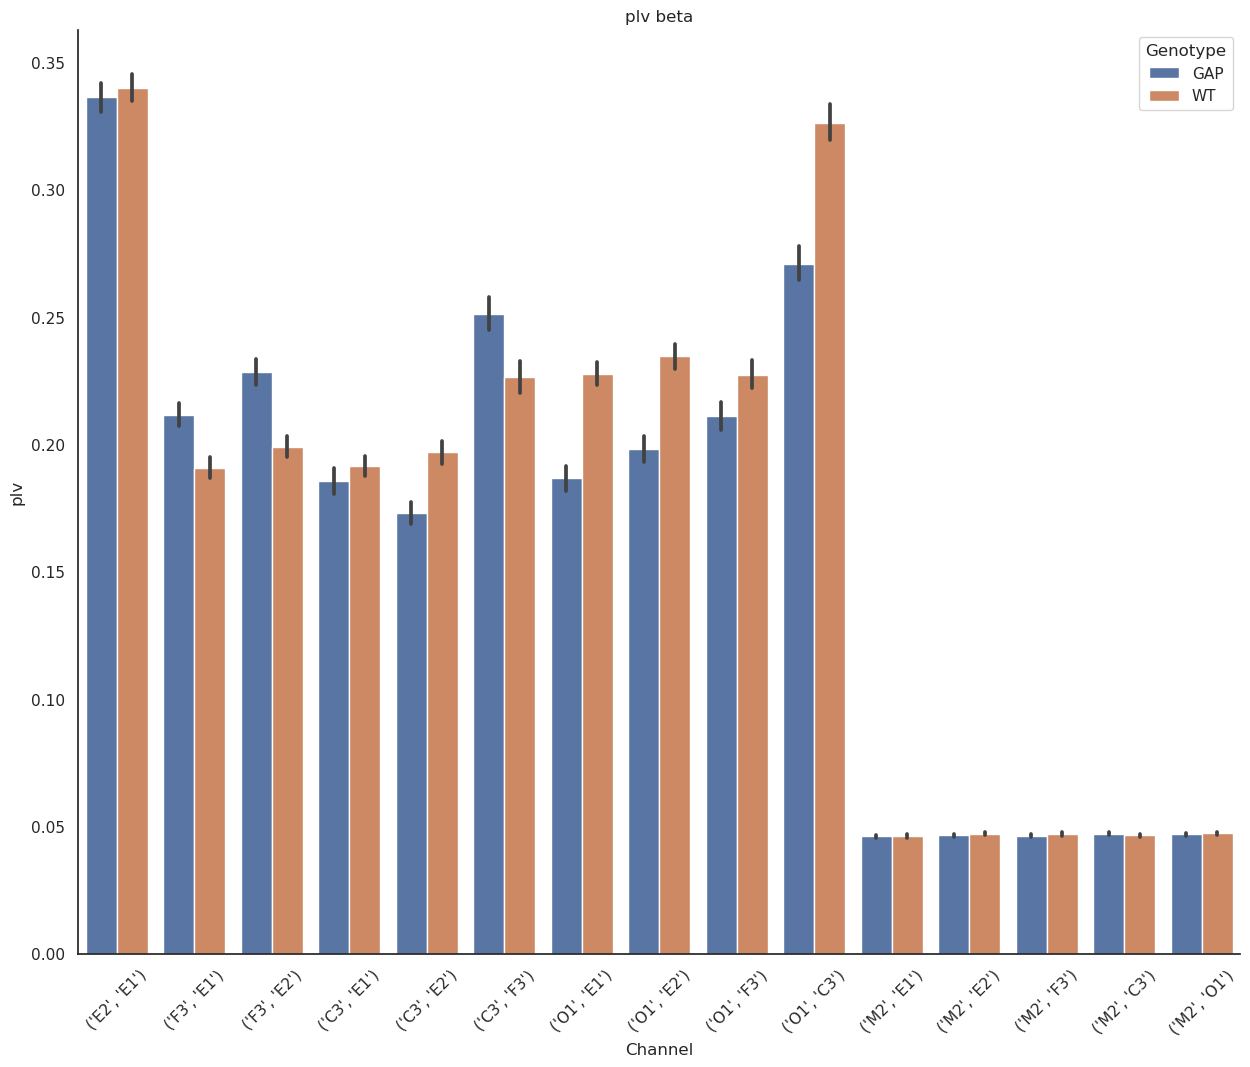

<Figure size 640x480 with 0 Axes>

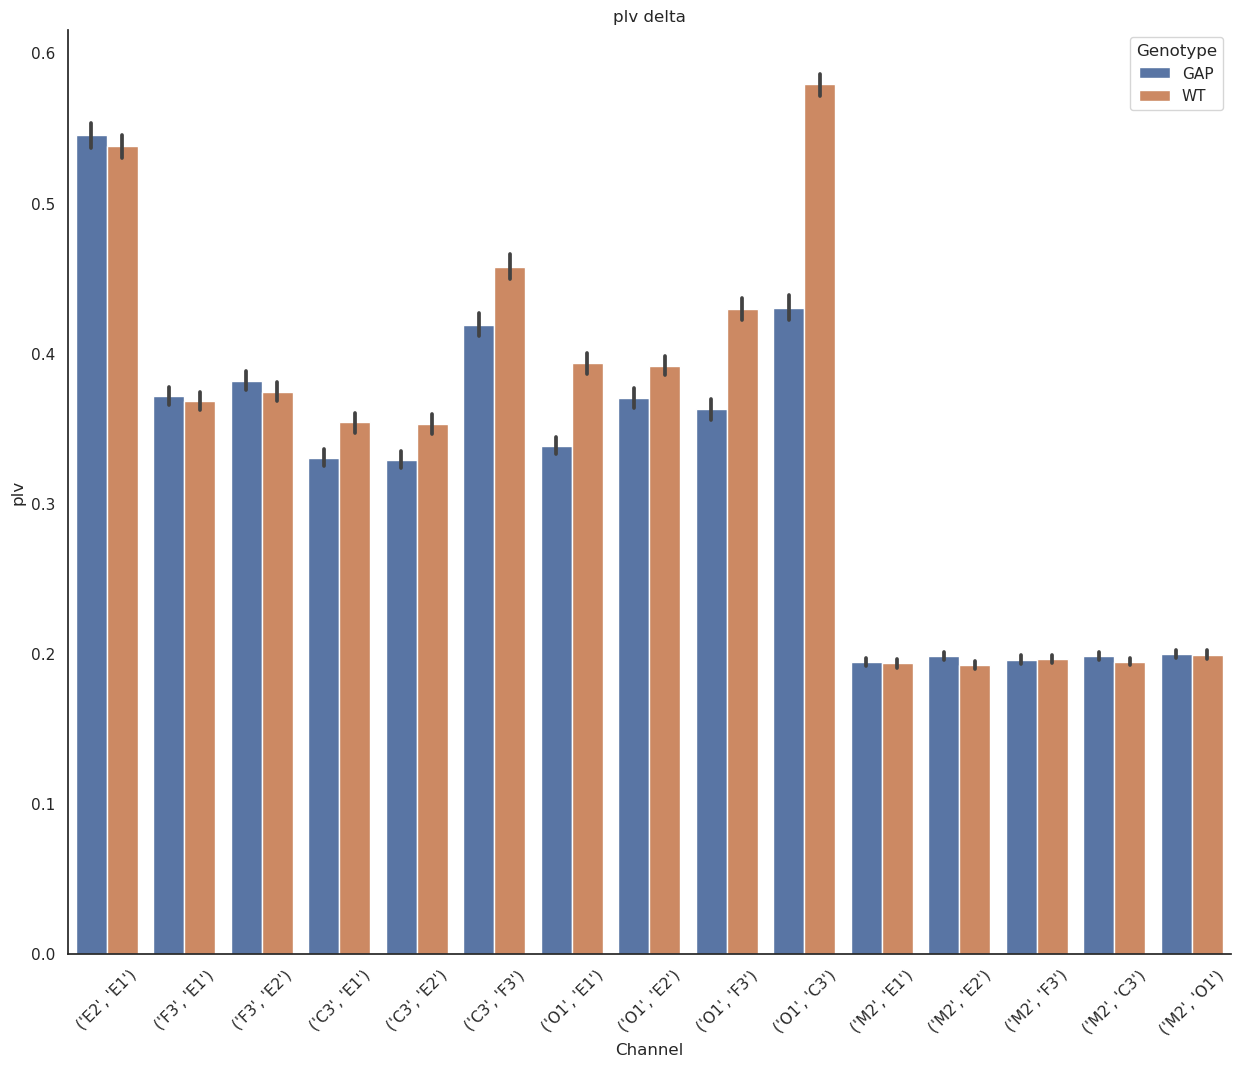

<Figure size 640x480 with 0 Axes>

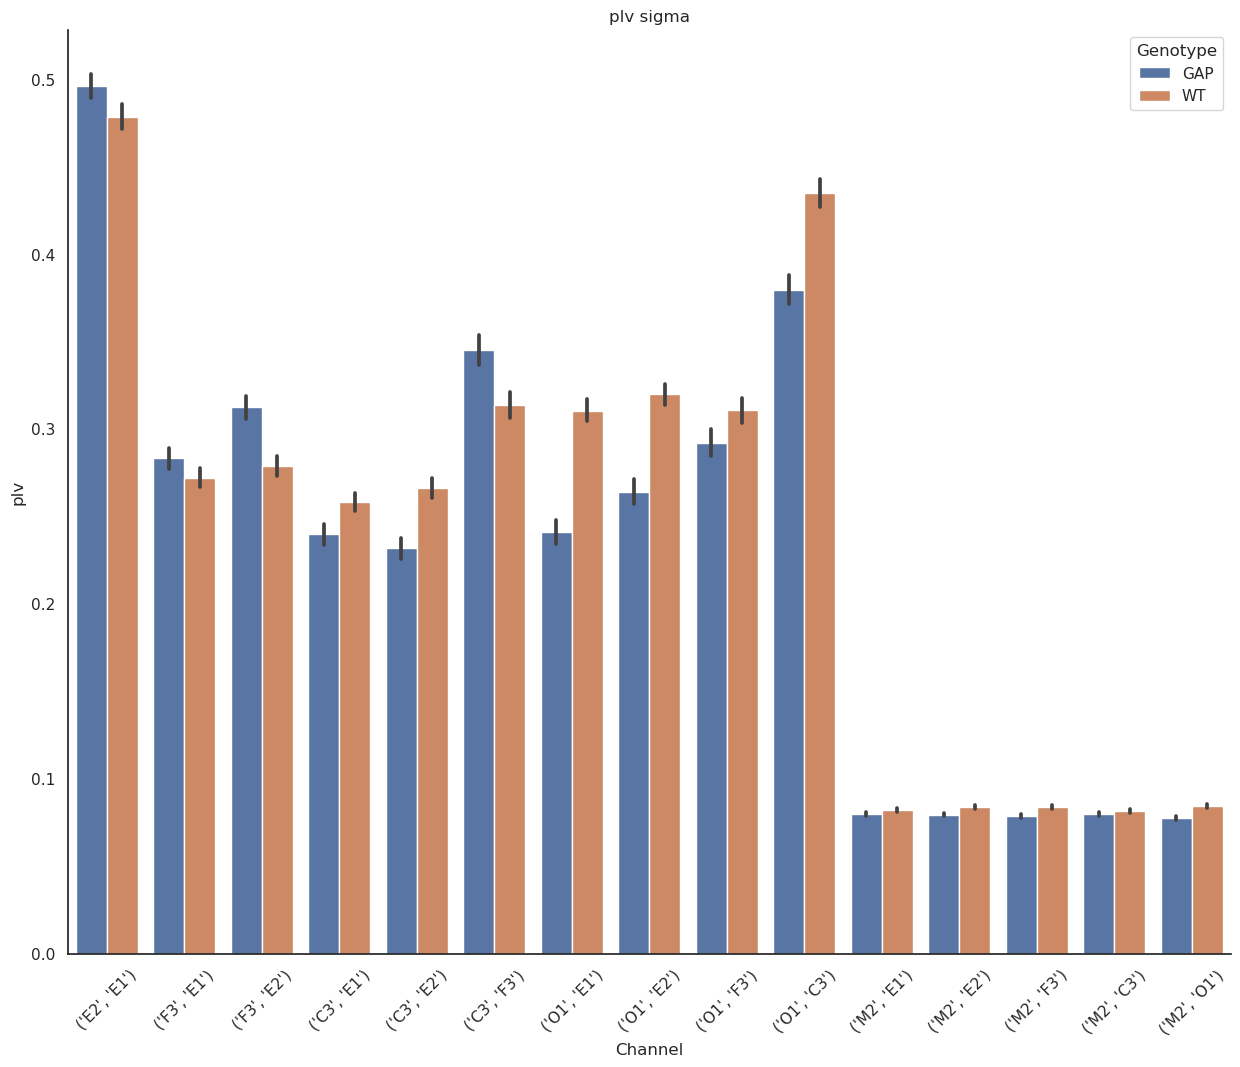

<Figure size 640x480 with 0 Axes>

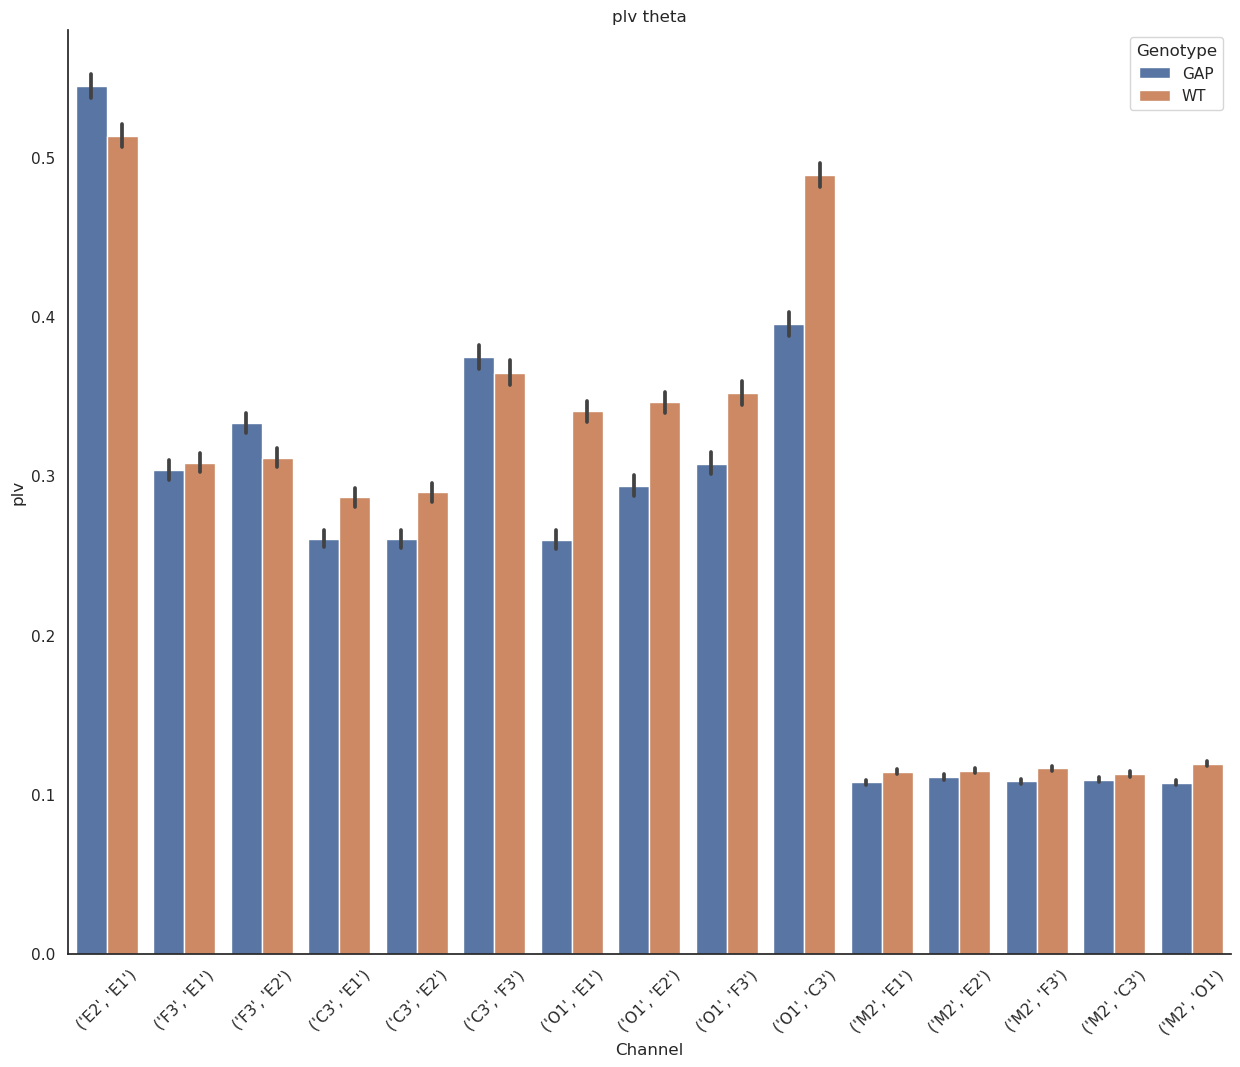

<Figure size 640x480 with 0 Axes>

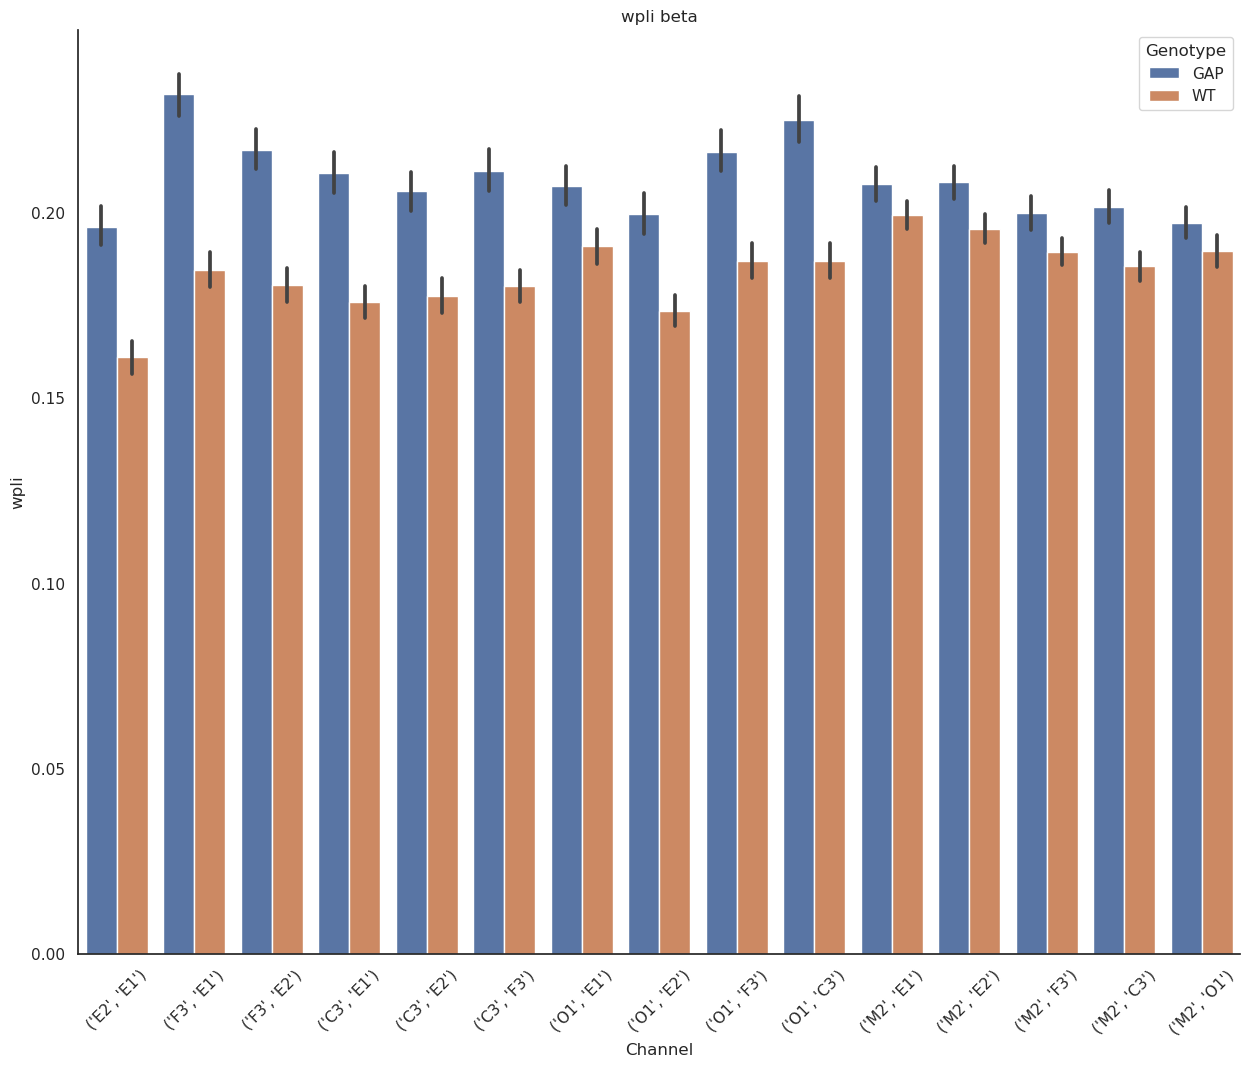

<Figure size 640x480 with 0 Axes>

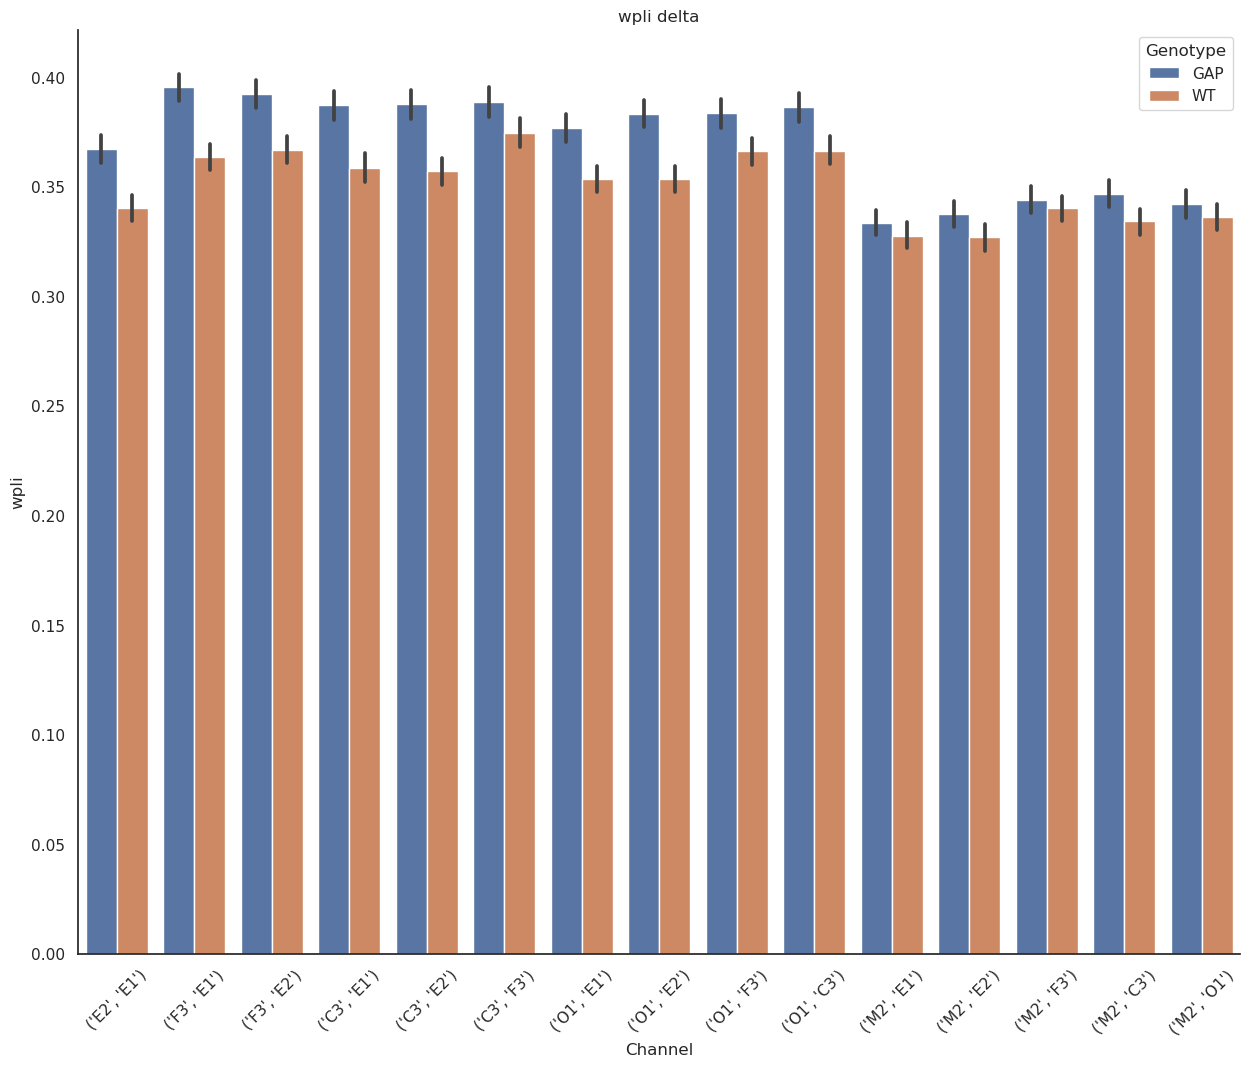

<Figure size 640x480 with 0 Axes>

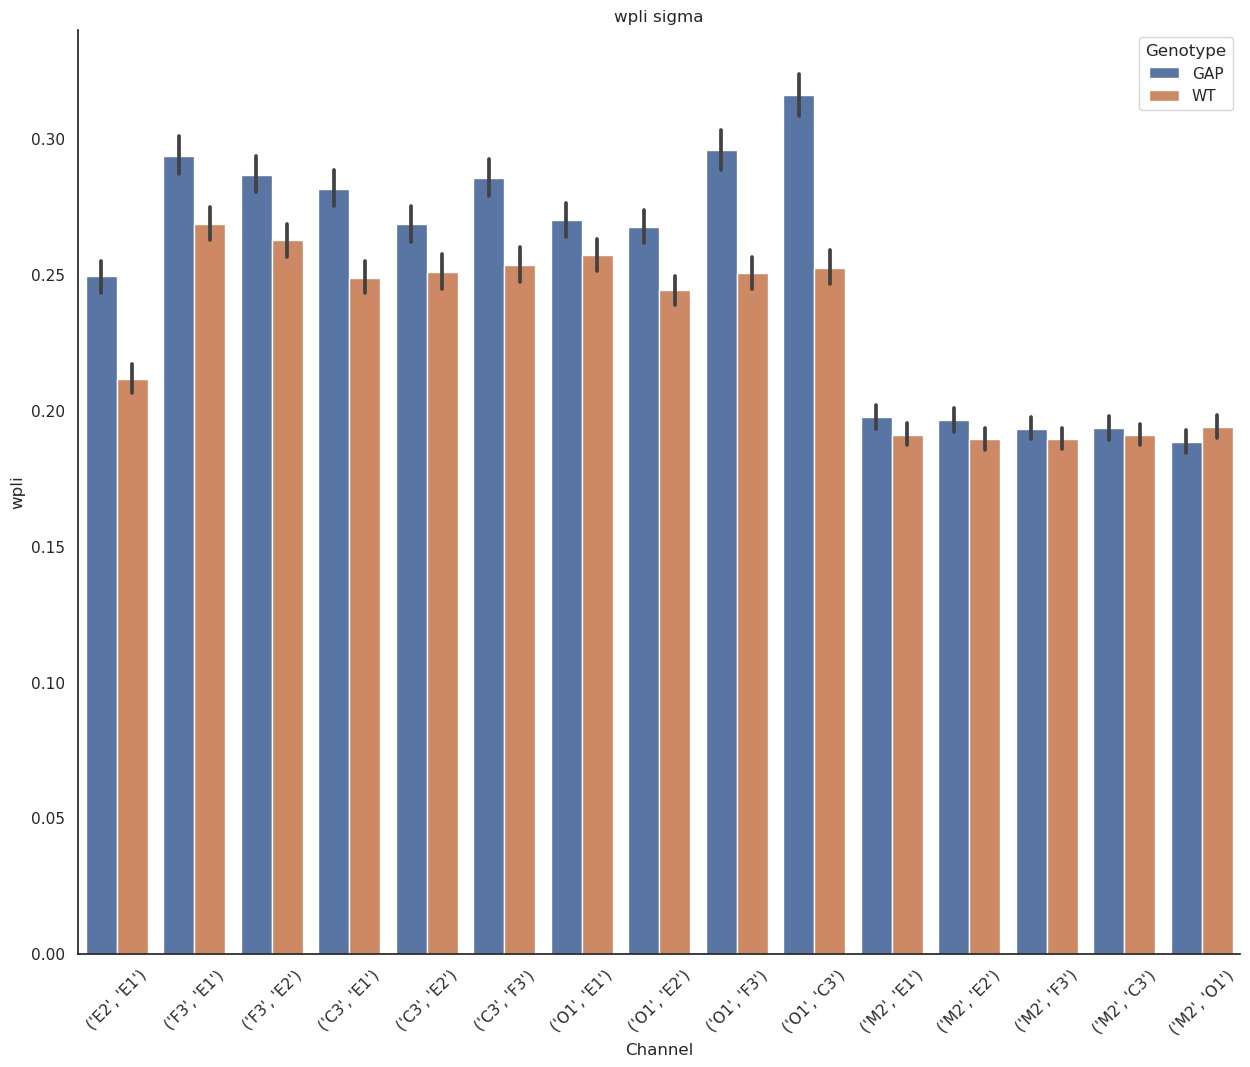

<Figure size 640x480 with 0 Axes>

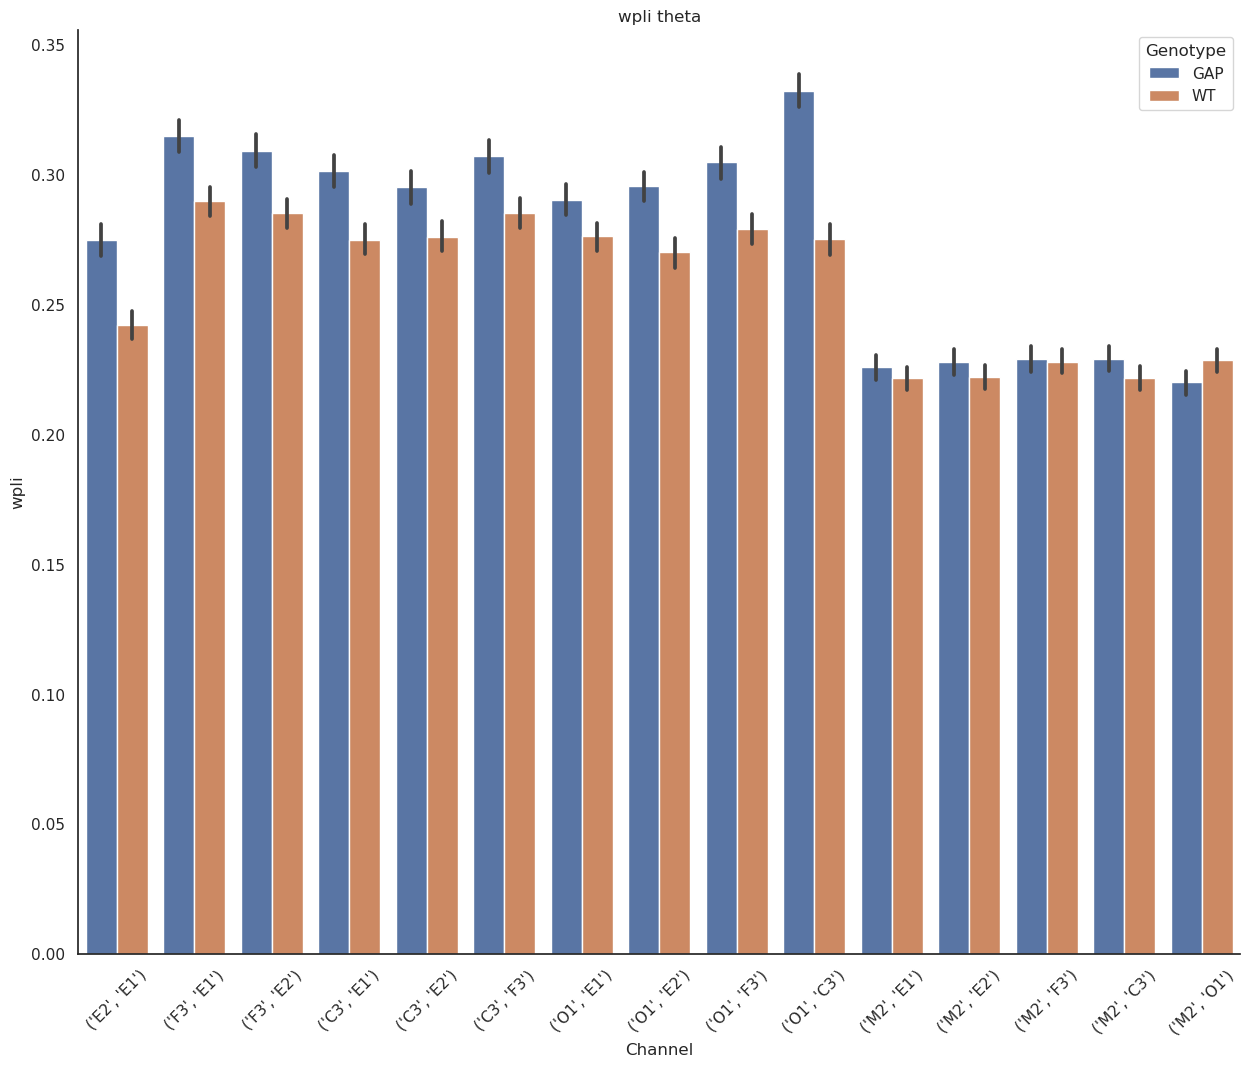

<Figure size 640x480 with 0 Axes>

In [34]:
for unq_met in unique_metrics:
    metric_df = patient_df_concat.loc[patient_df_concat['Metric'] == str(unq_met)]
    for freq in unique_freq:
        freq_df = metric_df.loc[metric_df['Frequency'] == str(freq)]
        sns.set(style="white")
        plt.figure(figsize=(15, 12))
        sns.barplot(x='Channel', y='Value', hue = 'Genotype', data=freq_df)
        sns.despine()
        plt.ylabel(str(unq_met))
        plt.title(str(unq_met) + ' ' + str(freq))
        plt.xticks(rotation=45)
        plt.savefig(figure_path + str(unq_met) + '/' + str(freq) + '.jpg')
        plt.show()
        plt.clf()